In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Normal MLE Estimates: mu = 233.83, sigma = 87.81
Exponential MLE Estimate: theta = 233.83


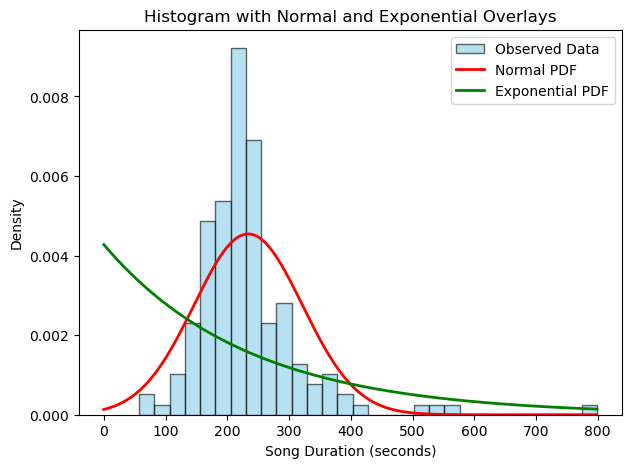

In [2]:
df = pd.read_csv("ds4420_spotify.csv")  
durations = df["duration_s"]        

# Fit Normal(µ, σ) by MLE
mu_hat = durations.mean()
sigma_hat = durations.std(ddof=1)  

# Fit Exponential(θ)
theta_hat = durations.mean()

print(f"Normal MLE Estimates: mu = {mu_hat:.2f}, sigma = {sigma_hat:.2f}")
print(f"Exponential MLE Estimate: theta = {theta_hat:.2f}")

# Histogram and overlay both distributions
plt.figure(figsize=(7,5))
count_vals, bin_edges, _ = plt.hist(
    durations,
    bins='auto',
    density=True,
    alpha=0.6,
    color='skyblue',
    edgecolor='black',
    label='Observed Data'
)

# Smooth grid of x-values
x_vals = np.linspace(0, durations.max(), 300)

# Normal PDF
pdf_norm = norm.pdf(x_vals, loc=mu_hat, scale=sigma_hat)
plt.plot(x_vals, pdf_norm, 'r-', lw=2, label='Normal PDF')

# Exponential PDF
pdf_exp = expon.pdf(x_vals, scale=theta_hat)
plt.plot(x_vals, pdf_exp, 'g-', lw=2, label='Exponential PDF')

plt.xlabel("Song Duration (seconds)")
plt.ylabel("Density")
plt.title("Histogram with Normal and Exponential Overlays")
plt.legend()
plt.show()

**Visual Fit:** Neither the normal nor the exponential curve perfectly matches the histogram. The normal at least peaks near ~200 seconds, while the exponential over‐predicts very short songs.     

   
**Intuition (from parts 4(a) & 5(a)):** This confirms our earlier reasoning that neither distribution is ideal—exponential ignores typical song structure, and normal fails to account for the positive skew and zero‐lower‐bound.      

**Probability Comparison:** The distributions give notably different values. For example, \(P(X > 4 \text{ min})\) is about 0.36 (exponential) vs. 0.47 (normal), and \(P(X < 1 \text{ min})\) is about 0.23 vs. 0.02, illustrating how each model handles the tails differently.  

**Suitability:** Neither model is very effective for song durations; a skewed, positive distribution (like lognormal or gamma) typically fits better.